# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | mukah
City not found. Skipping...
Processing Record 5 of Set 1 | la passe
Processing Record 6 of Set 1 | sitampiky
City not found. Skipping...
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | polyarnyy
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | nambucca heads
Processing Record 14 of Set 1 | hadgaon
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | pagar alam
Processing Record 18 of Set 1 | kota
Processing Record 19 of Set 1 | guaratinga
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 |

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.6391,-120.4579,63.01,66,20,11.01,US,1697121820
1,waitangi,-43.9535,-176.5597,46.81,81,99,1.99,NZ,1697122096
2,stanley,54.8680,-1.6985,56.52,61,20,9.22,GB,1697122096
3,la passe,45.5549,-0.8967,84.43,41,87,4.45,FR,1697122096
4,invercargill,-46.4000,168.3500,53.02,78,100,11.01,NZ,1697122064


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.6391,-120.4579,63.01,66,20,11.01,US,1697121820
1,waitangi,-43.9535,-176.5597,46.81,81,99,1.99,NZ,1697122096
2,stanley,54.8680,-1.6985,56.52,61,20,9.22,GB,1697122096
3,la passe,45.5549,-0.8967,84.43,41,87,4.45,FR,1697122096
4,invercargill,-46.4000,168.3500,53.02,78,100,11.01,NZ,1697122064


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

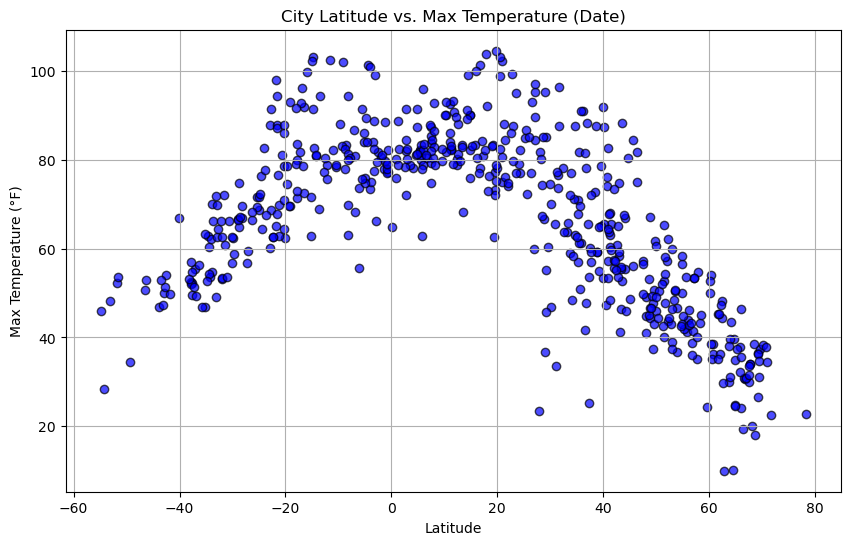

In [10]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="blue", edgecolor="black", alpha=0.7)

# Incorporate other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show the plot
plt.show()

#### Latitude Vs. Humidity

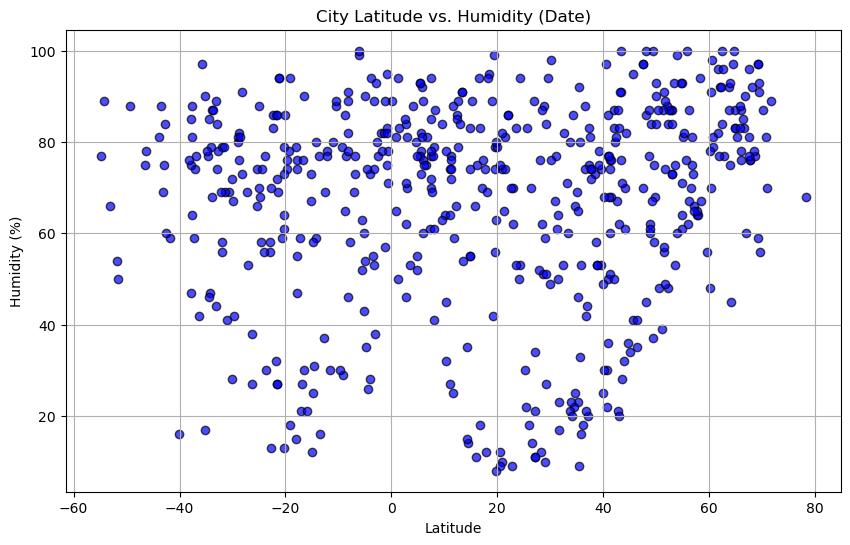

In [11]:
# Build the scatter plot for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="blue", edgecolor="black", alpha=0.7)

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show the plot
plt.show()


#### Latitude Vs. Cloudiness

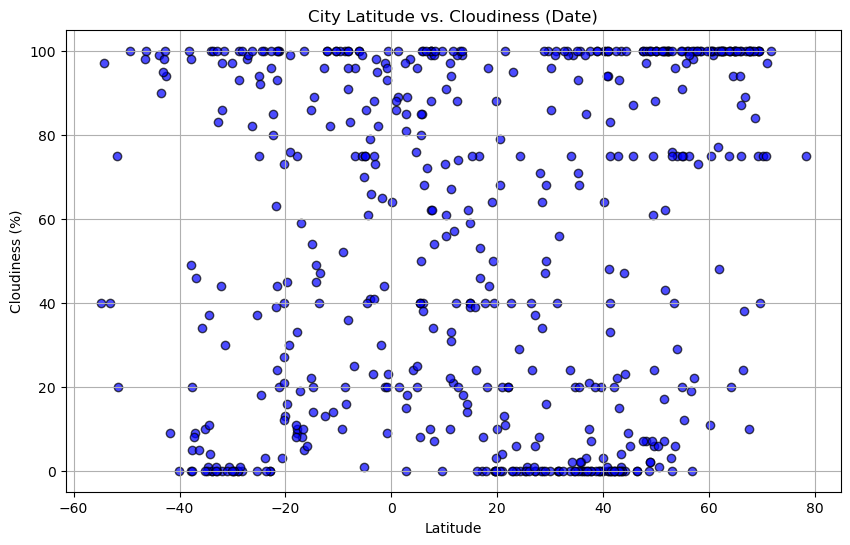

In [12]:
# Build the scatter plot for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="blue", edgecolor="black", alpha=0.7)

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show the plot
plt.show()


#### Latitude vs. Wind Speed Plot

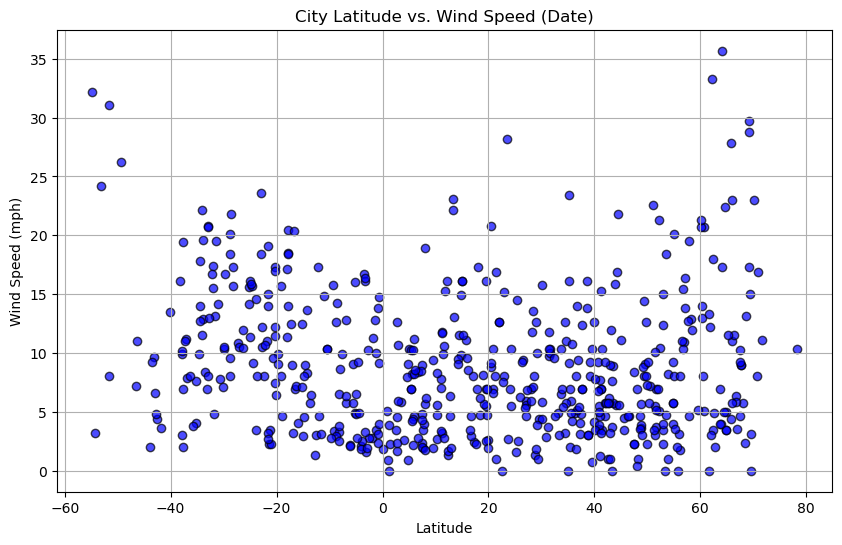

In [13]:
# Build the scatter plot for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="blue", edgecolor="black", alpha=0.7)

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show the plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots

def create_linear_regression_plot(x_values, y_values, x_label, y_label, title):
    # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Create the regression line
    regression_line = slope * x_values + intercept
    
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, marker="o", color="blue", edgecolor="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_values, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Add the equation of the regression line as text on the plot
    equation_text = f"R-squared: {r_value**2:.2f}\n\ny = {slope:.2f}x + {intercept:.2f}"
    plt.text(min(x_values), min(y_values), equation_text, fontsize=12, color="red")
    
    # Add a legend
    plt.legend()
    
    # Show the plot
    plt.grid(True)
    plt.show()

In [15]:
# Create a DataFrame with data for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.6391,-120.4579,63.01,66,20,11.01,US,1697121820
2,stanley,54.8680,-1.6985,56.52,61,20,9.22,GB,1697122096
3,la passe,45.5549,-0.8967,84.43,41,87,4.45,FR,1697122096
6,polyarnyy,69.1989,33.4478,36.50,97,100,28.77,RU,1697121818
7,thompson,55.7435,-97.8558,41.16,100,100,0.00,CA,1697121932


In [16]:
# Create a DataFrame with data for the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,46.81,81,99,1.99,NZ,1697122096
4,invercargill,-46.4000,168.3500,53.02,78,100,11.01,NZ,1697122064
5,edinburgh of the seven seas,-37.0676,-12.3116,55.35,74,9,11.21,SH,1697122097
8,grytviken,-54.2811,-36.5092,28.44,89,97,3.22,GS,1697122097
10,nambucca heads,-30.6500,153.0000,66.20,69,1,7.76,AU,1697122098


###  Temperature vs. Latitude Linear Regression Plot

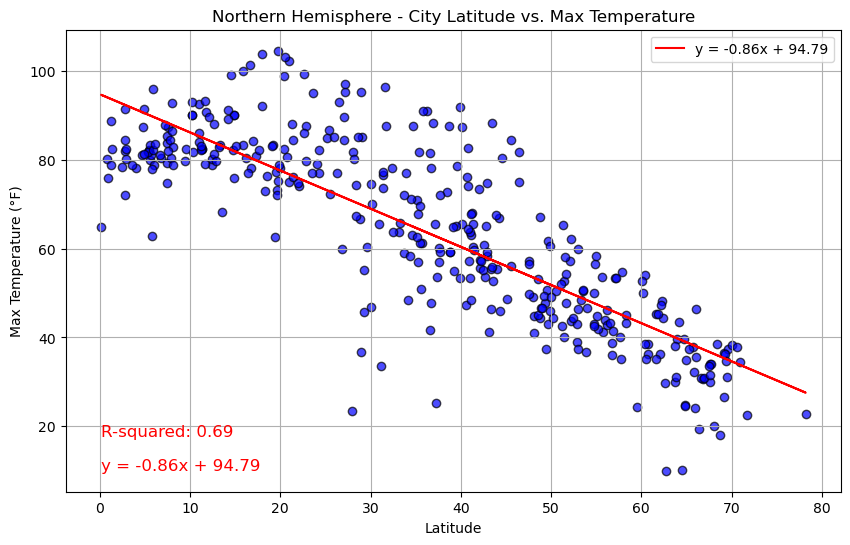

In [18]:
# Linear regression on Northern Hemisphere
# Perform linear regression on Northern Hemisphere data
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature (°F)"
title = "Northern Hemisphere - City Latitude vs. Max Temperature"

create_linear_regression_plot(x_values, y_values, x_label, y_label, title)

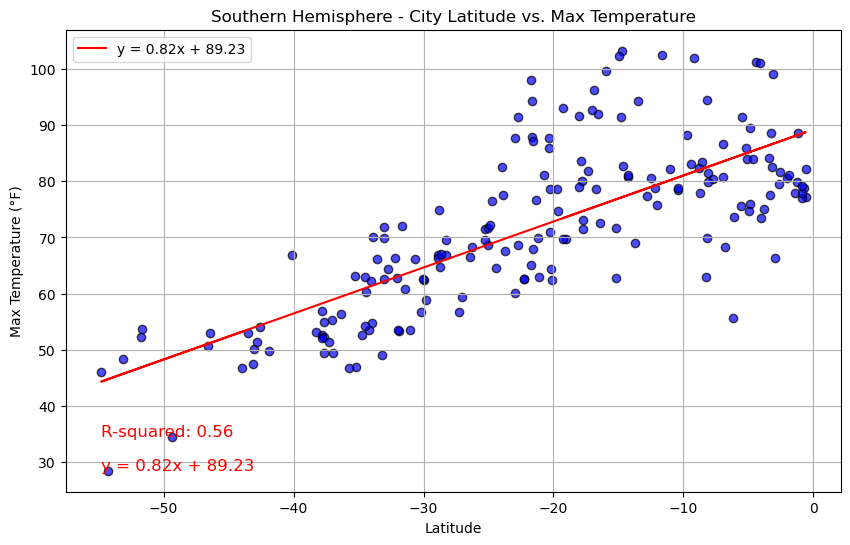

In [19]:
# Linear regression on Southern Hemisphere
# Perform linear regression on Southern Hemisphere data
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature (°F)"
title = "Southern Hemisphere - City Latitude vs. Max Temperature"

create_linear_regression_plot(x_values, y_values, x_label, y_label, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

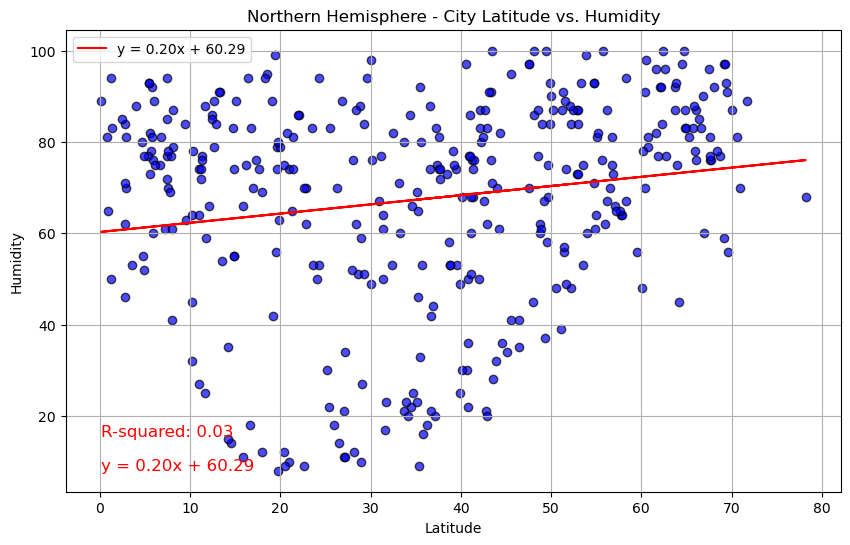

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
title = "Northern Hemisphere - City Latitude vs. Humidity"

create_linear_regression_plot(x_values, y_values, x_label, y_label, title)

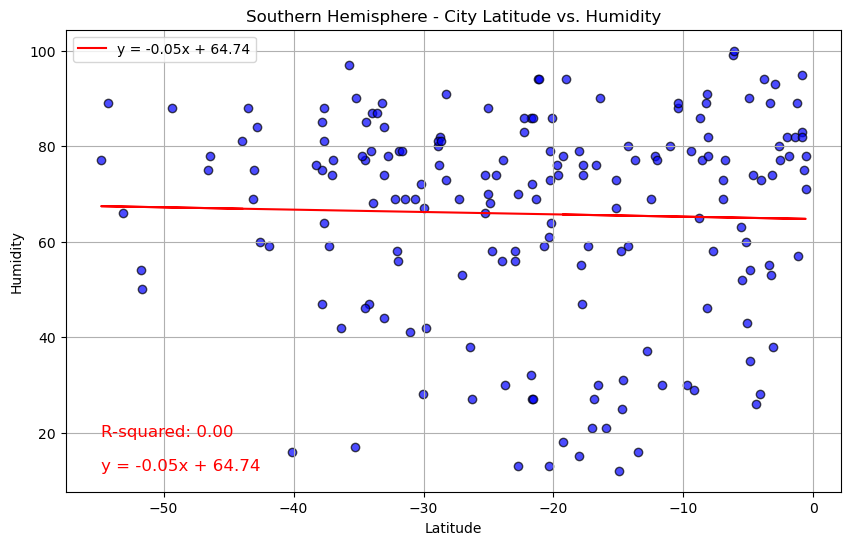

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
title = "Southern Hemisphere - City Latitude vs. Humidity"

create_linear_regression_plot(x_values, y_values, x_label, y_label, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

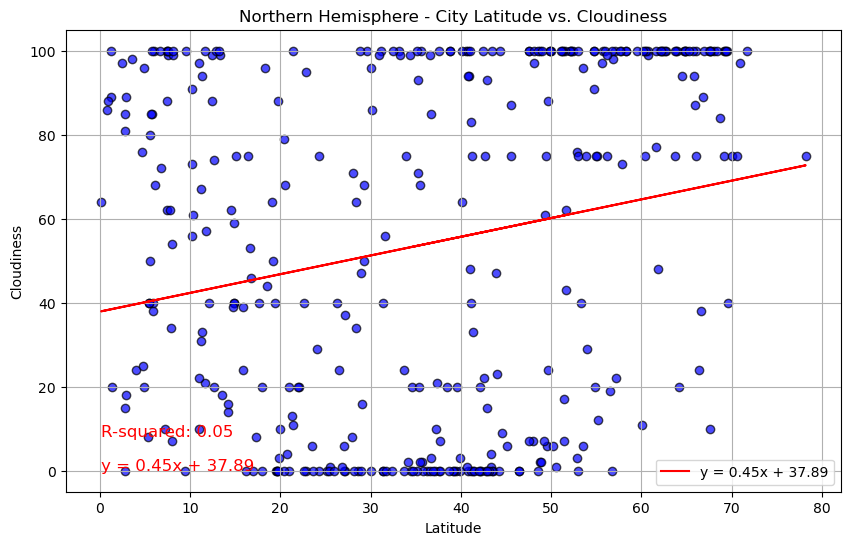

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
title = "Northern Hemisphere - City Latitude vs. Cloudiness"

create_linear_regression_plot(x_values, y_values, x_label, y_label, title)

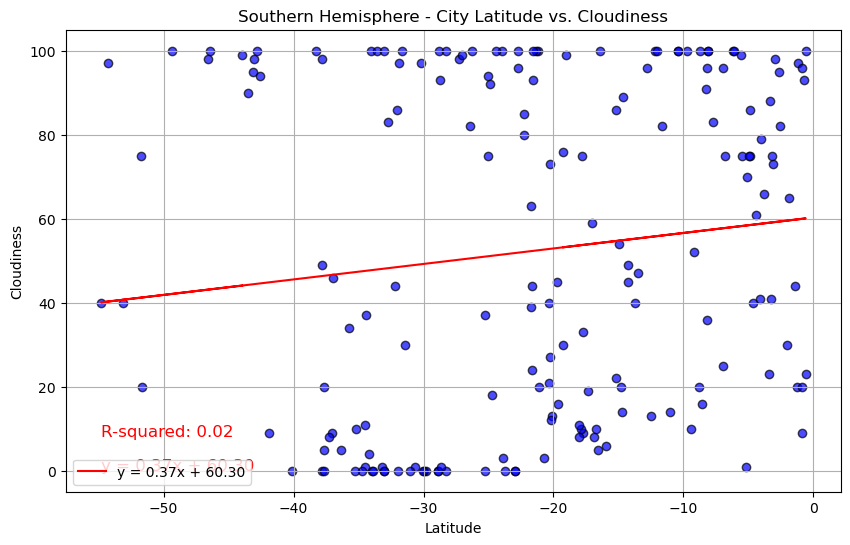

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
title = "Southern Hemisphere - City Latitude vs. Cloudiness"

create_linear_regression_plot(x_values, y_values, x_label, y_label, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

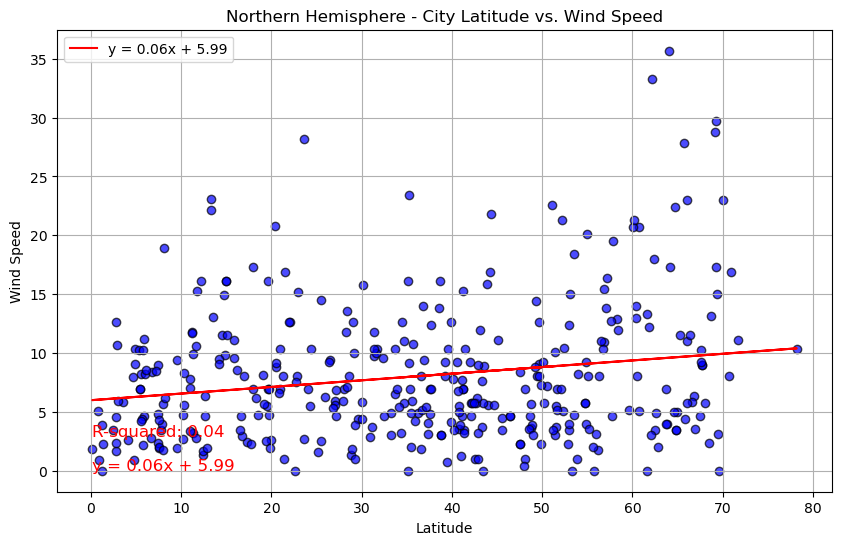

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title = "Northern Hemisphere - City Latitude vs. Wind Speed"

create_linear_regression_plot(x_values, y_values, x_label, y_label, title)

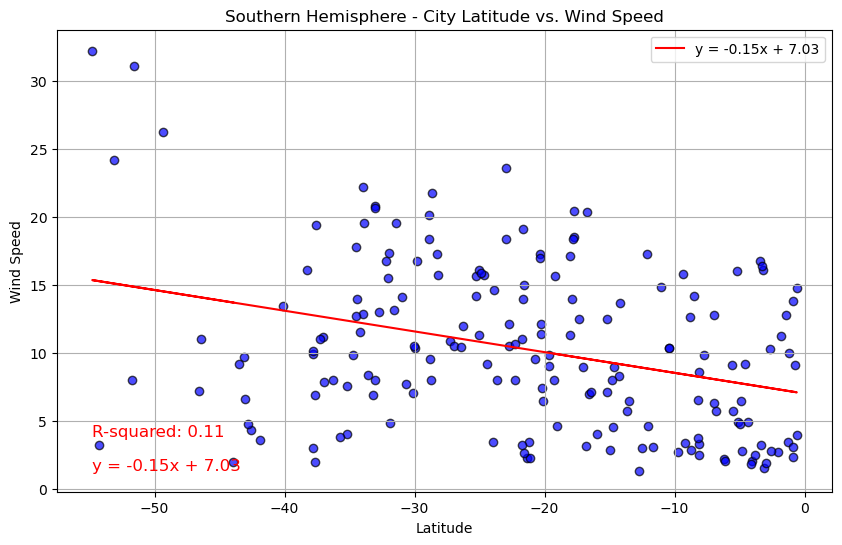

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
title = "Southern Hemisphere - City Latitude vs. Wind Speed"

create_linear_regression_plot(x_values, y_values, x_label, y_label, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Note: you may need to restart the kernel to use updated packages.
